In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import statistics
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
from statsmodels.compat import lzip
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Airbnb_Data.csv')

# data overview 


In [3]:
def data_overview(df):
    print('overview of data')
    print('------------------')
    display(df.head())
    print("the shape of the dataset")
    print('--------------------')
    display(df.head())
    print("statistical summary")
    print("----------------------------------------------------------------------------")
    display(df.describe().T)
    print("\n")

    print("information of features")
    print("----------------------------------------------------------------------------")
    display(df.info())
    print("\n")

    print("missing values")
    print("----------------------------------------------------------------------------")
    display(df.isnull().sum())
    print("\n")

    print("checking for duplicates")
    print("----------------------------------------------------------------------------")
    print(f"number of dupliacte rows: {df.duplicated().sum()}")
    print("\n")

    object_columns = df.select_dtypes(include='object').columns #identify columns with object data type
    for column in object_columns:
        print("value counts for " + column)
        print("----------------------------------------------------------------------------")
        print(df[column].value_counts())
        print("\n")

In [4]:
data_overview(df)

overview of data
------------------


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


the shape of the dataset
--------------------


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


statistical summary
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.000000,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
log_price,74111.0,4.782069e+00,7.173938e-01,0.000000,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00
accommodates,74111.0,3.155146e+00,2.153589e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73911.0,1.235263e+00,5.820441e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
latitude,74111.0,3.844596e+01,3.080167e+00,33.338905,3.412791e+01,4.066214e+01,4.074610e+01,4.239044e+01
longitude,74111.0,-9.239753e+01,2.170532e+01,-122.511500,-1.183424e+02,-7.699696e+01,-7.395466e+01,-7.098505e+01
number_of_reviews,74111.0,2.090057e+01,3.782864e+01,0.000000,1.000000e+00,6.000000e+00,2.300000e+01,6.050000e+02
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74020.0,1.265793e+00,8.521435e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01




information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  o

None



missing values
----------------------------------------------------------------------------


id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64



checking for duplicates
----------------------------------------------------------------------------
number of dupliacte rows: 0


value counts for property_type
----------------------------------------------------------------------------
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet           

Key Observations

1. There are 74111 rows and 29 columns in the dataset of which some columns are not relevant for our model, we will remove them during pre-processing.
3. 'aminities' columns has dictionaries passed in it for amminities in each column, we will replace this dictionary with a count of amminities in each property.
3. data type for 10 columns is numeric, 18 columns object type and 1 column is boolean type, column 'host_response_rate' has data in percentage terms. However, due to '%' sign the datatype is object while the data is continuous so we will remove the '%' and convert it into numeric data as it makes more sense that ways.
4. There are significant number of missing values in the data frame which we will have to impute.
5. There are no duplicates in the data.
6. Columns 'property_type' and 'cancellation_propert are relavant for us, however, value count for these columns shows that 6.there are groups within these features whose value count is very low. Due to these groups our model might get unstable or there might be an issue of overfitting, to overcome this issue we will merge some groups for these features

# Data Pre-processing

In [5]:
airbnb_v1 = df.drop(['id', 'description','first_review', 'host_has_profile_pic','host_since', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood',
                         'thumbnail_url', 'zipcode'], axis = 1)
airbnb_v1.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,t,NaN,f,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,f,100%,t,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,100%,t,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,t,NaN,f,0,NaN,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,100%,t,4,40.0,0.0,1.0


Converting data type for 'host_response_rate' to numeric

In [6]:
airbnb_v1['host_response_rate']= airbnb_v1['host_response_rate'].str.rstrip('%').astype('float')/100
airbnb_v1['host_response_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 74111 entries, 0 to 74110
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
55812 non-null  float64
dtypes: float64(1)
memory usage: 579.1 KB


# Imputing missing values

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
SI = SimpleImputer(strategy = 'median')
SI.fit(airbnb_v1.select_dtypes(include = 'number'))
imputer = SI.transform(airbnb_v1.select_dtypes(include = 'number'))
airbnb_num = pd.DataFrame(imputer, columns = airbnb_v1.select_dtypes(include = 'number').columns)
airbnb_num.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,3.0,1.0,1.0,2.0,100.0,1.0,1.0
1,5.129899,7.0,1.0,1.0,6.0,93.0,3.0,3.0
2,4.976734,5.0,1.0,1.0,10.0,92.0,1.0,3.0
3,6.620073,4.0,1.0,1.0,0.0,96.0,2.0,2.0
4,4.744932,2.0,1.0,1.0,4.0,40.0,0.0,1.0


In [9]:
airbnb_num.isnull().sum()

log_price               0
accommodates            0
bathrooms               0
host_response_rate      0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

In [10]:
SI = SimpleImputer(strategy = 'most_frequent')
SI.fit(airbnb_v1.select_dtypes(include = 'object'))
imputer = SI.transform(airbnb_v1.select_dtypes(include = 'object'))
airbnb_obj = pd.DataFrame(imputer, columns = airbnb_v1.select_dtypes(include = 'object').columns)
airbnb_obj.head()

,property_type,room_type,amenities,bed_type,cancellation_policy,city,host_identity_verified,instant_bookable
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,t,f
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,f,t
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,t,t
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,SF,t,f
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,DC,t,t


In [11]:
airbnb_obj.isnull().sum()

property_type             0
room_type                 0
amenities                 0
bed_type                  0
cancellation_policy       0
city                      0
host_identity_verified    0
instant_bookable          0
dtype: int64

In [12]:
# merging 'airbnb_obj' with 'airbnb_v2' and adding 'cleaning_fee' column
airbnb_v2 = pd.concat([airbnb_num, airbnb_obj], axis = 1)
airbnb_v2['cleaning_fee'] = airbnb_v1['cleaning_fee']
airbnb_v2.isnull().sum()

log_price                 0
accommodates              0
bathrooms                 0
host_response_rate        0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
property_type             0
room_type                 0
amenities                 0
bed_type                  0
cancellation_policy       0
city                      0
host_identity_verified    0
instant_bookable          0
cleaning_fee              0
dtype: int64

In [13]:
airbnb_v2.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,room_type,amenities,bed_type,cancellation_policy,city,host_identity_verified,instant_bookable,cleaning_fee
0,5.010635,3.0,1.0,1.0,2.0,100.0,1.0,1.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,t,f,True
1,5.129899,7.0,1.0,1.0,6.0,93.0,3.0,3.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,f,t,True
2,4.976734,5.0,1.0,1.0,10.0,92.0,1.0,3.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,t,t,True
3,6.620073,4.0,1.0,1.0,0.0,96.0,2.0,2.0,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,SF,t,f,True
4,4.744932,2.0,1.0,1.0,4.0,40.0,0.0,1.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,DC,t,t,True


# count of aminities

In [14]:
aminities_count = []
for i in airbnb_v2['amenities']:
  aminities_count.append(len(i))

airbnb_v2['amenities'] = aminities_count
airbnb_v2.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   accommodates            74111 non-null  float64
 2   bathrooms               74111 non-null  float64
 3   host_response_rate      74111 non-null  float64
 4   number_of_reviews       74111 non-null  float64
 5   review_scores_rating    74111 non-null  float64
 6   bedrooms                74111 non-null  float64
 7   beds                    74111 non-null  float64
 8   property_type           74111 non-null  object 
 9   room_type               74111 non-null  object 
 10  amenities               74111 non-null  int64  
 11  bed_type                74111 non-null  object 
 12  cancellation_policy     74111 non-null  object 
 13  city                    74111 non-null  object 
 14  host_identity_verified  74111 non-null

# Merging groups

In [15]:

value_count = airbnb_v2['property_type'].value_counts()
other_values = value_count[value_count < 50].index
airbnb_v2['property_type'] = airbnb_v2['property_type'].replace(other_values, 'Other')
airbnb_v2['property_type'].value_counts()

property_type
Apartment          49003
House              16511
Condominium         2658
Townhouse           1692
Loft                1244
Other                715
Guesthouse           498
Bed & Breakfast      462
Bungalow             366
Villa                179
Dorm                 142
Guest suite          123
Camper/RV             94
Timeshare             77
Cabin                 72
In-law                71
Hostel                70
Boutique hotel        69
Boat                  65
Name: count, dtype: int64

In [16]:
airbnb_v2['cancellation_policy'] = airbnb_v2['cancellation_policy'].replace(['super_strict_30', 'super_strict_60'], 'super_strict')
airbnb_v2['cancellation_policy'].value_counts()

cancellation_policy
strict          32374
flexible        22545
moderate        19063
super_strict      129
Name: count, dtype: int64

# Exploratory Data Analysis
Univariate Analysis
For numeric columns

In [17]:
def univariateAnalysis_numeric(df,column):
    print(f'Skewness of {column}: ', df[column].skew())
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")

    # Calculate min and max values for the column
    a = round(df[column].min())
    b = round(df[column].max())
    # Plot histogram with annotations
    freq, bins, patches = axs[0].hist(df[column], range=[a, b], edgecolor='pink', color='cyan')
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        axs[0].annotate("{}".format(height),
                    xy=(x, height),  # top left corner of the histogram bar
                    xytext=(0, 0.2),  # offsetting label position above its bar
                    textcoords="offset points",  # Offset (in points) from the *xy* value
                    ha='center', va='bottom')
        n = n + 1
    axs[0].set_xlabel(column)
    axs[0].tick_params(axis='x', labelrotation=90)

    # Plot boxplot
    sns.boxplot(x=column, data=df, ax=axs[1], color = 'pink')
    axs[1].tick_params(axis='x', labelrotation=90)

    # Show the plots
    plt.show()

Skewness of log_price:  0.5146954132526429
Distribution of log_price
----------------------------------------------------------------------------


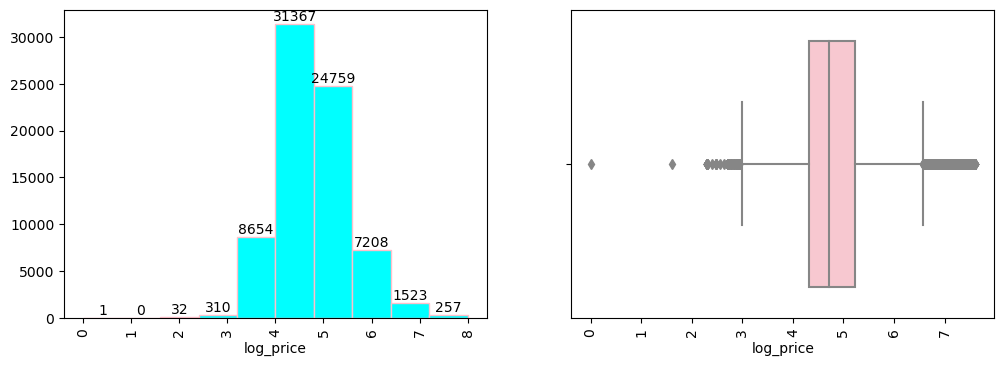

Skewness of accommodates:  2.231560573846241
Distribution of accommodates
----------------------------------------------------------------------------


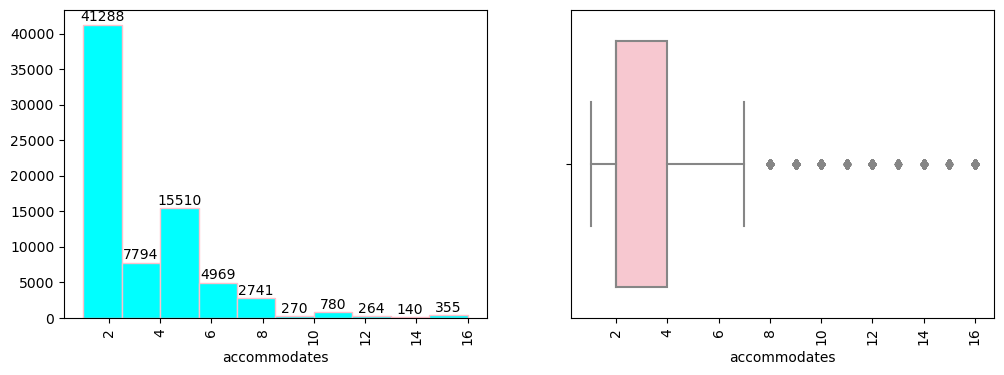

Skewness of bathrooms:  3.697097824420094
Distribution of bathrooms
----------------------------------------------------------------------------


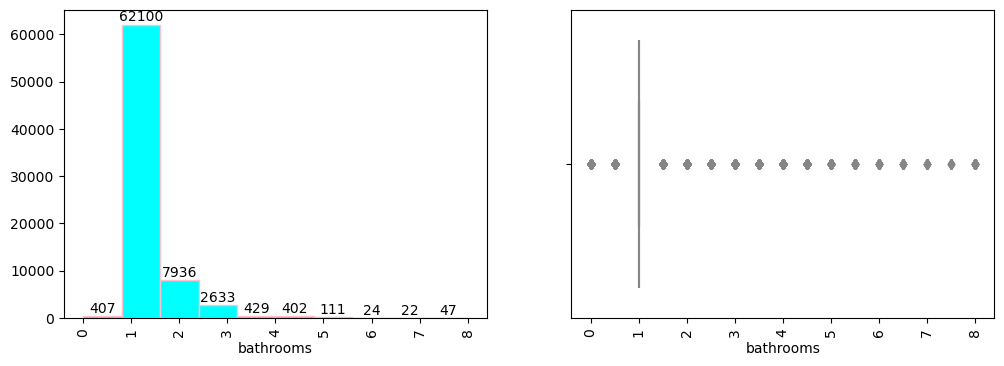

Skewness of host_response_rate:  -4.776563852731746
Distribution of host_response_rate
----------------------------------------------------------------------------


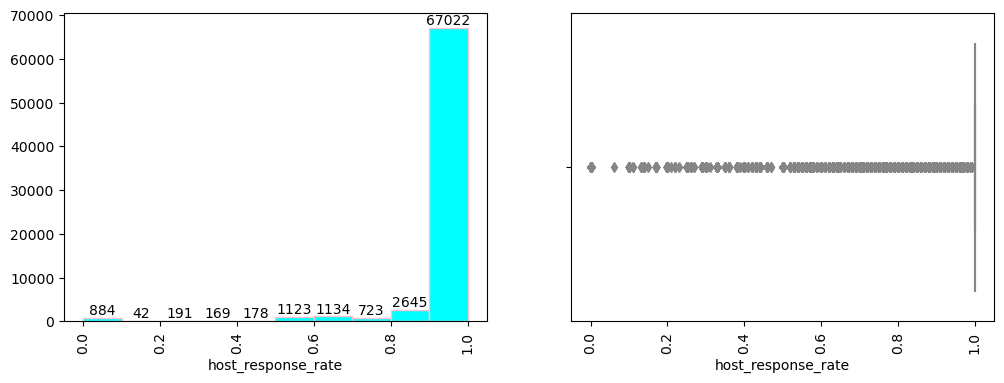

Skewness of number_of_reviews:  3.7028349778393865
Distribution of number_of_reviews
----------------------------------------------------------------------------


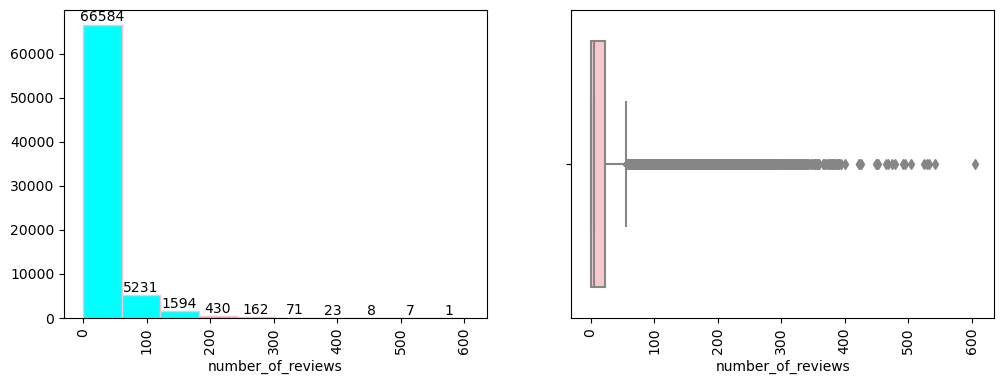

Skewness of review_scores_rating:  -3.948001568473135
Distribution of review_scores_rating
----------------------------------------------------------------------------


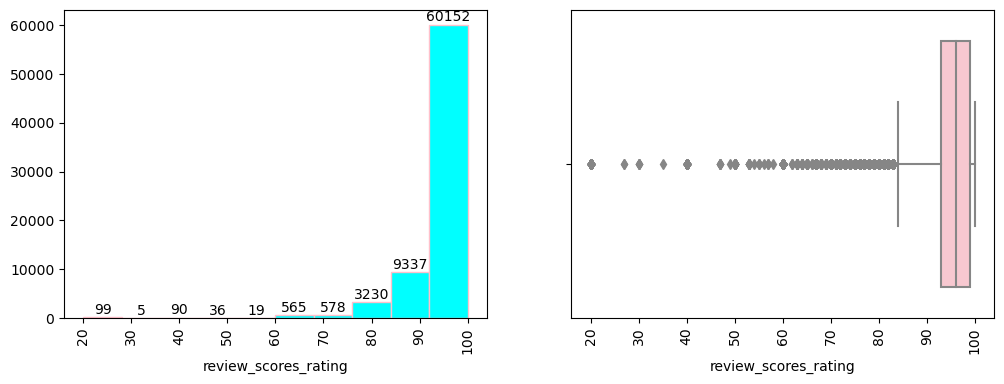

Skewness of bedrooms:  1.9918270658583581
Distribution of bedrooms
----------------------------------------------------------------------------


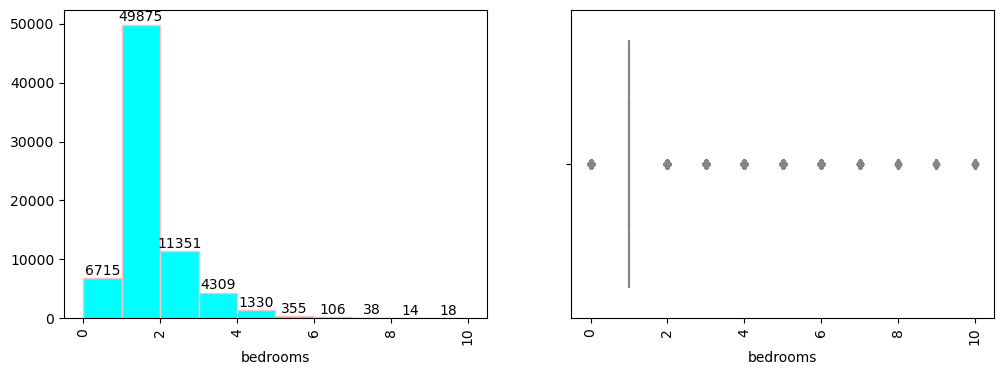

Skewness of beds:  3.360795937035629
Distribution of beds
----------------------------------------------------------------------------


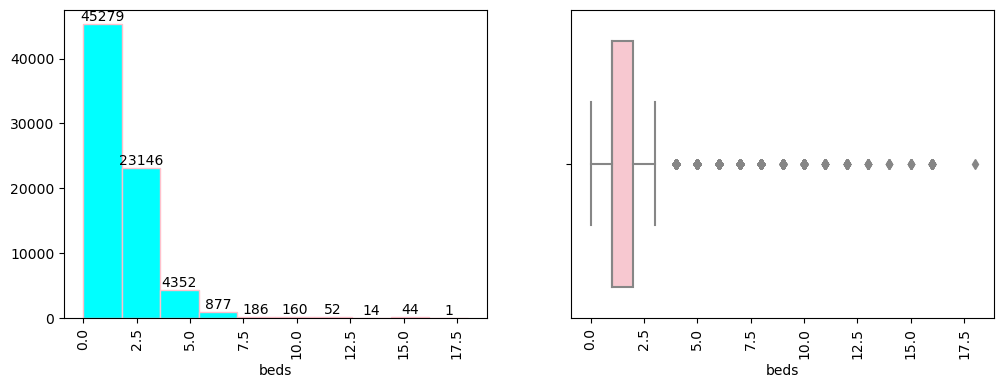

Skewness of amenities:  0.9512158797514776
Distribution of amenities
----------------------------------------------------------------------------


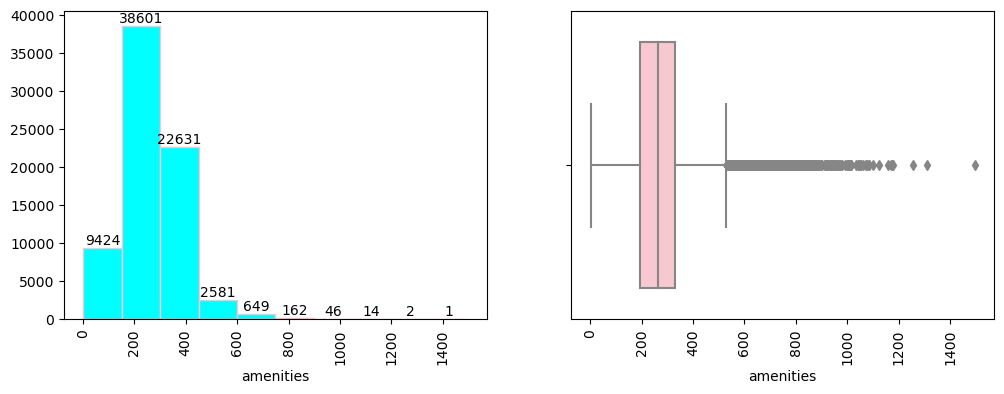

In [18]:
for column in airbnb_v2.select_dtypes(include = 'number').columns:
  univariateAnalysis_numeric(airbnb_v2, column)

Observations
There is skewness in all the numeric columns, log_price has lowest skewness of 0.51 and host_response_rate has highest skewness of -4.77.
There are significant number of outliers for all the columns.
We will not be treating the skewness and outliers in the data as we want our model to capture their effect. #### for object columns

In [19]:
def univariateAnalysis_category(df, cat_column):
    print("Details of the " + cat_column)
    print("----------------------------")
    plt.figure()
    plt.figure(figsize=(12, 8))
    plots = df[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
    plt.show()
    print("       ")
    
    

Details of the property_type
----------------------------


<Figure size 640x480 with 0 Axes>

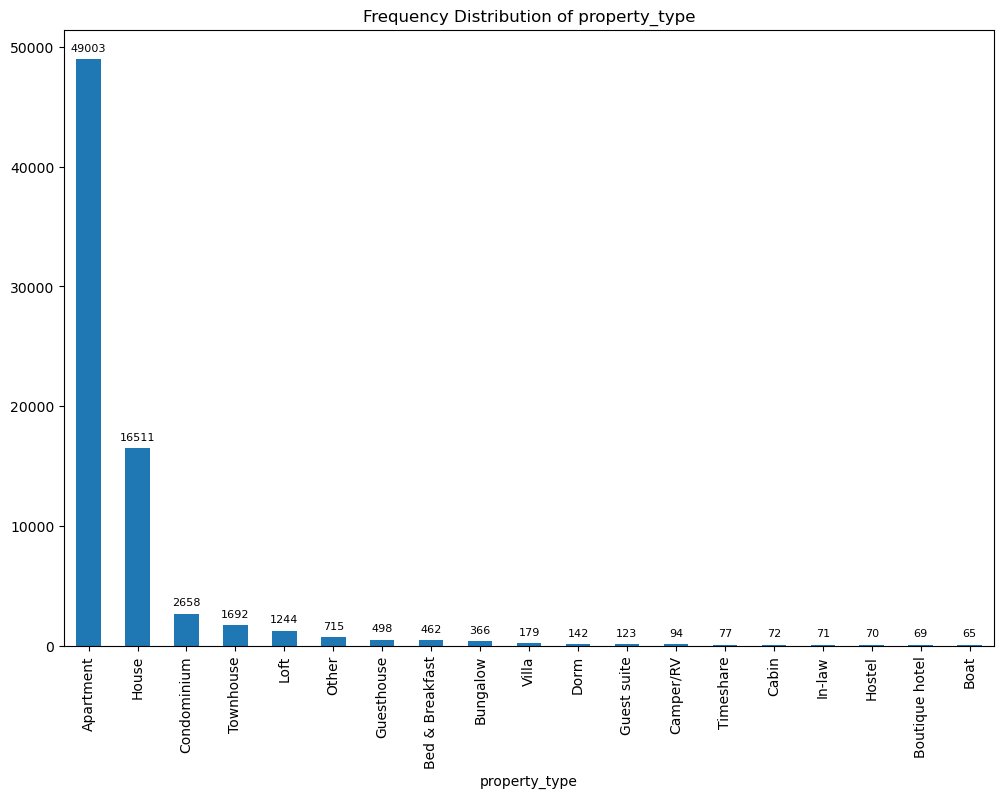

       
Details of the room_type
----------------------------


<Figure size 640x480 with 0 Axes>

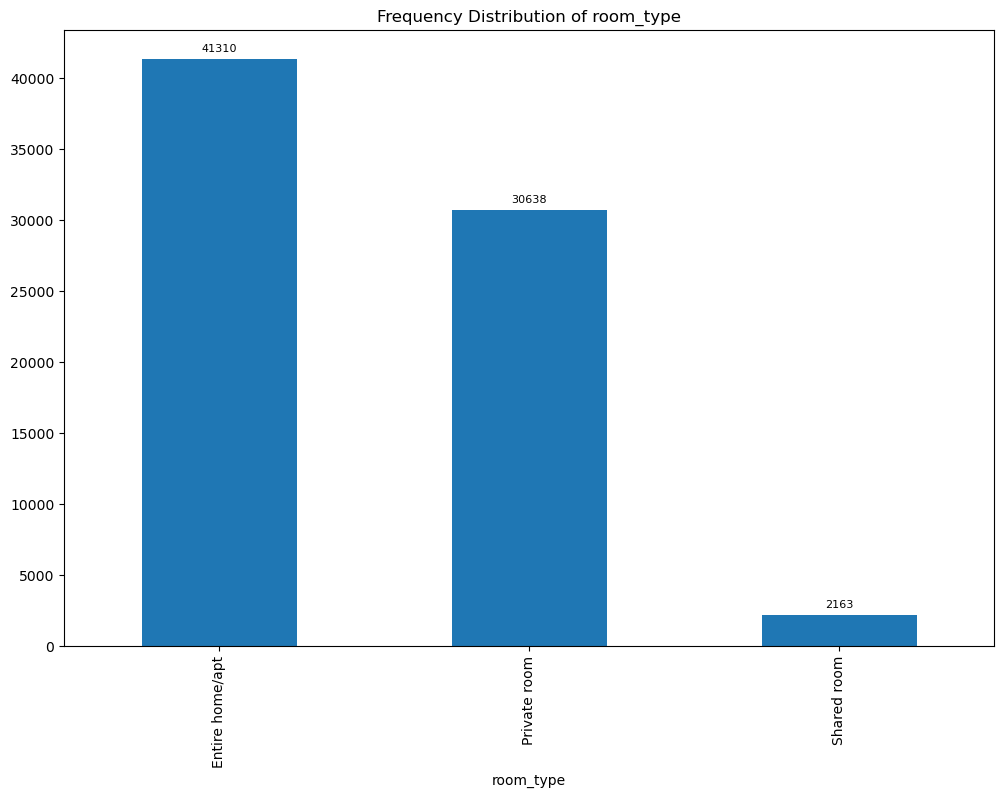

       
Details of the bed_type
----------------------------


<Figure size 640x480 with 0 Axes>

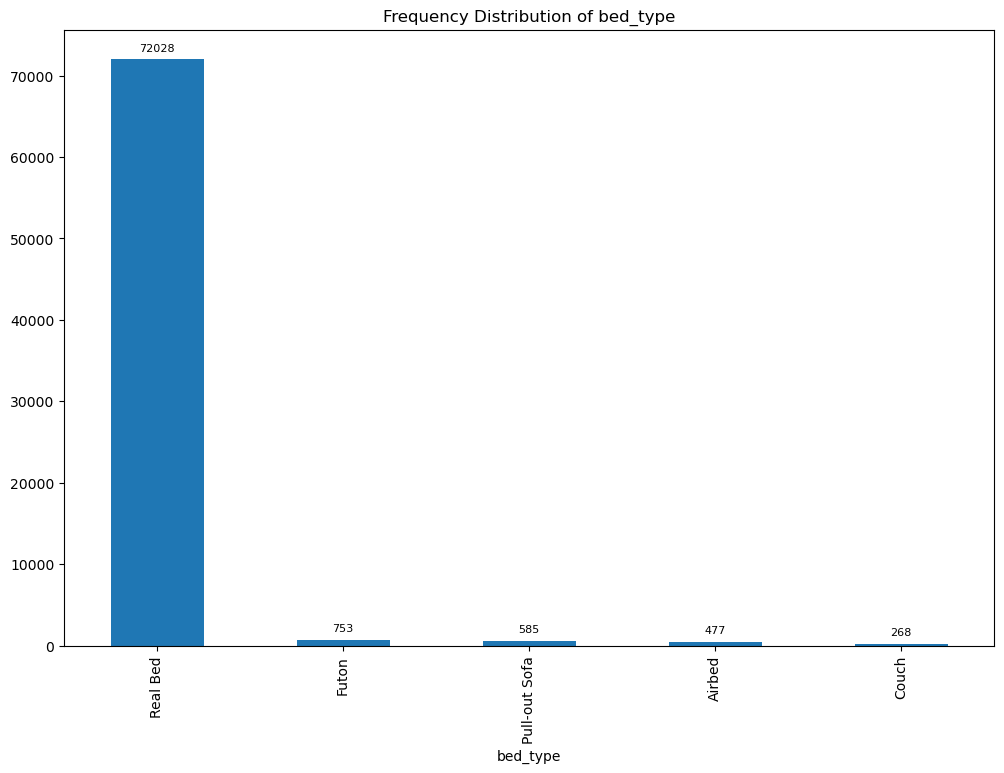

       
Details of the cancellation_policy
----------------------------


<Figure size 640x480 with 0 Axes>

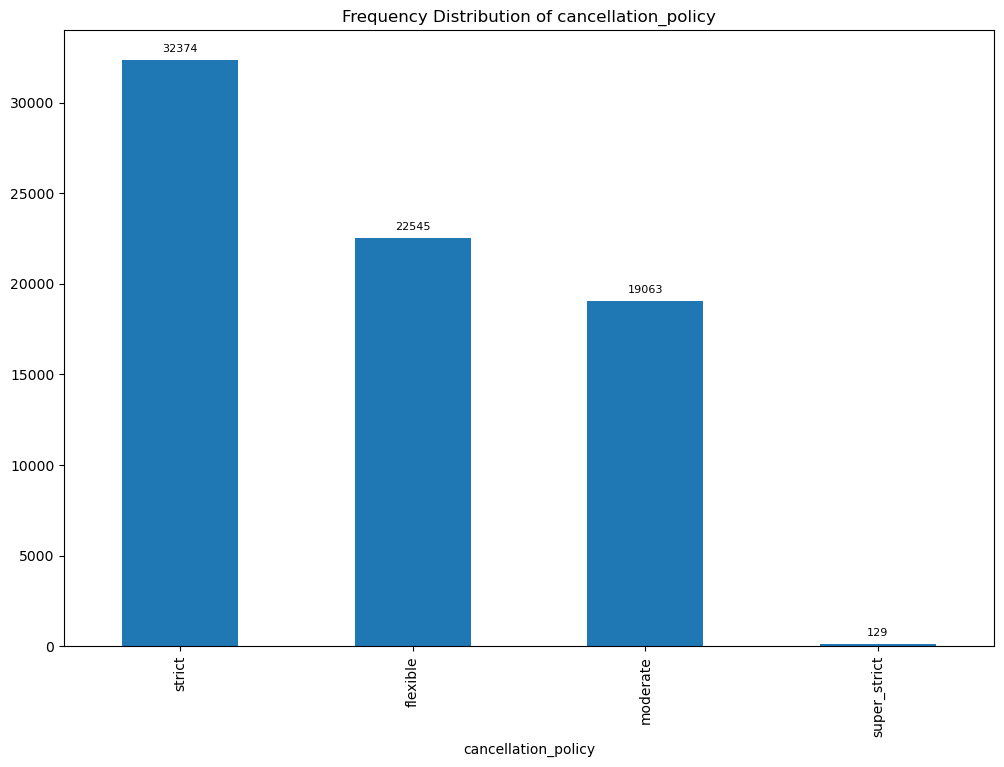

       
Details of the city
----------------------------


<Figure size 640x480 with 0 Axes>

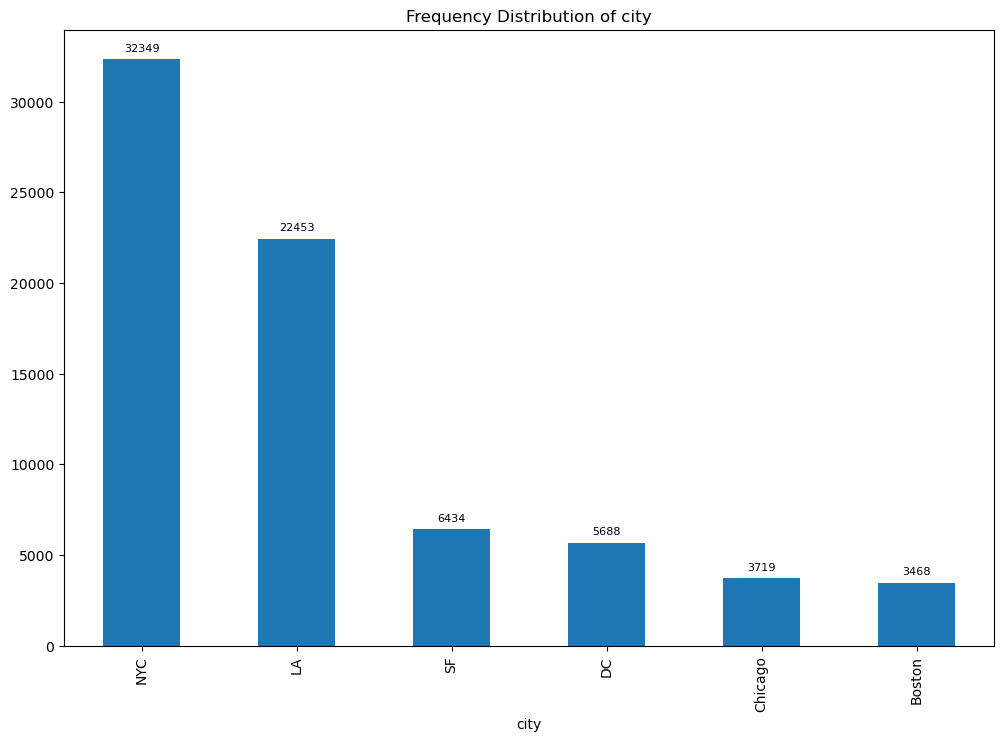

       
Details of the host_identity_verified
----------------------------


<Figure size 640x480 with 0 Axes>

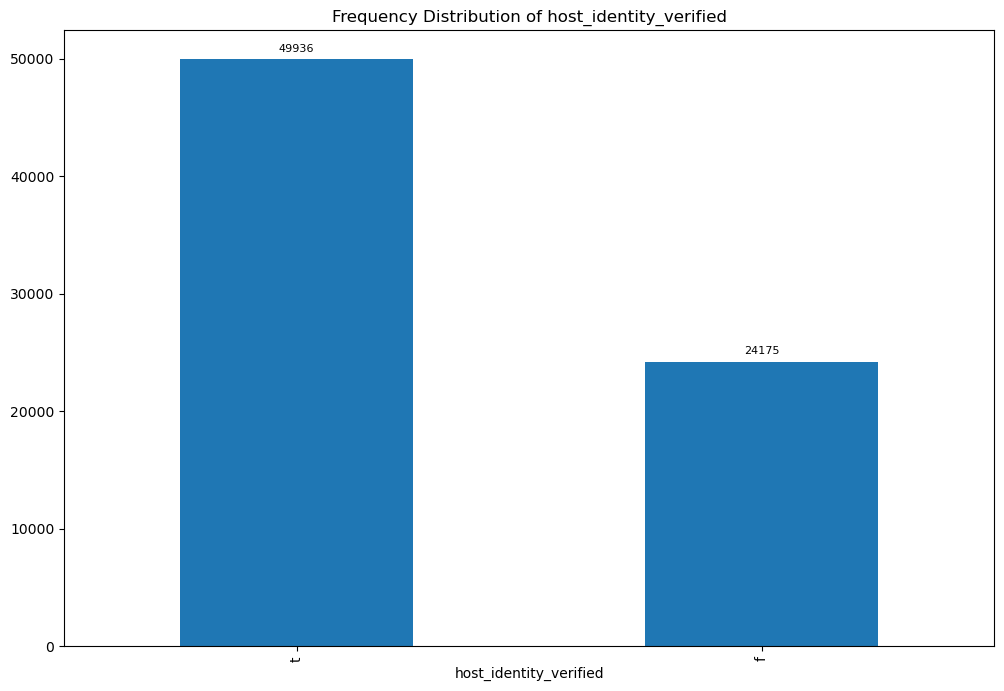

       
Details of the instant_bookable
----------------------------


<Figure size 640x480 with 0 Axes>

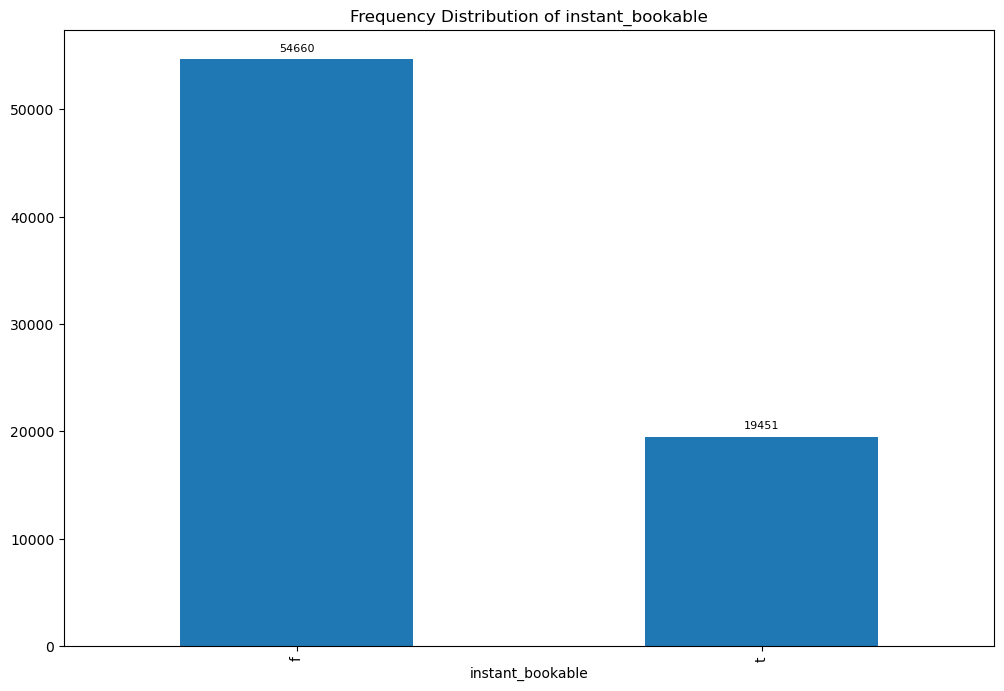

       
Details of the cleaning_fee
----------------------------


<Figure size 640x480 with 0 Axes>

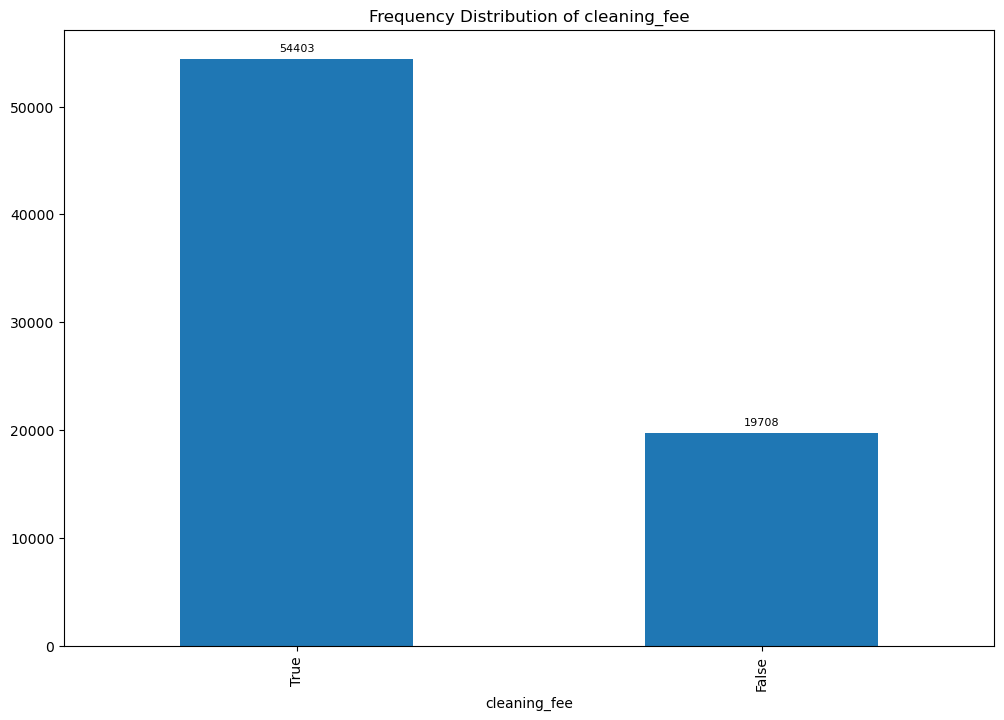

In [20]:
for column in airbnb_v2.select_dtypes(include = ['object','bool']).columns:
  univariateAnalysis_category(airbnb_v2, column)

Key observations
Mostly Apartments or houses are listed in which owners prefer booking of either entire property or individual rooms in the property.
Over two third of the properties charge cleaning fees and are not instantly bookable, however, almmost all of them do not have super strict cancellation policy.
New york city has the highest number of listed properties while Boston has the least number.
Approximately one-third of hosts have not verified their identities, posing a potential risk for the business. These unverified hosts may engage in fraudulent activities, which could not only adversely affect their property ratings but also significantly damage Airbnb's reputation.

Bivariate Analysis

In [23]:
def bivariate_num_num(df, df_num):
  # pairplot
  print('pair plot')
  sns.pairplot(data = df, corner = True)
  plt.show()

  # heatmap
  print('heatmap')
  corr = df_num.corr(method='pearson')
  mask = np.triu(np.ones_like(corr, dtype=np.bool_))
  fig = plt.subplots(figsize=(25, 15))
  sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
  plt.show()

pair plot


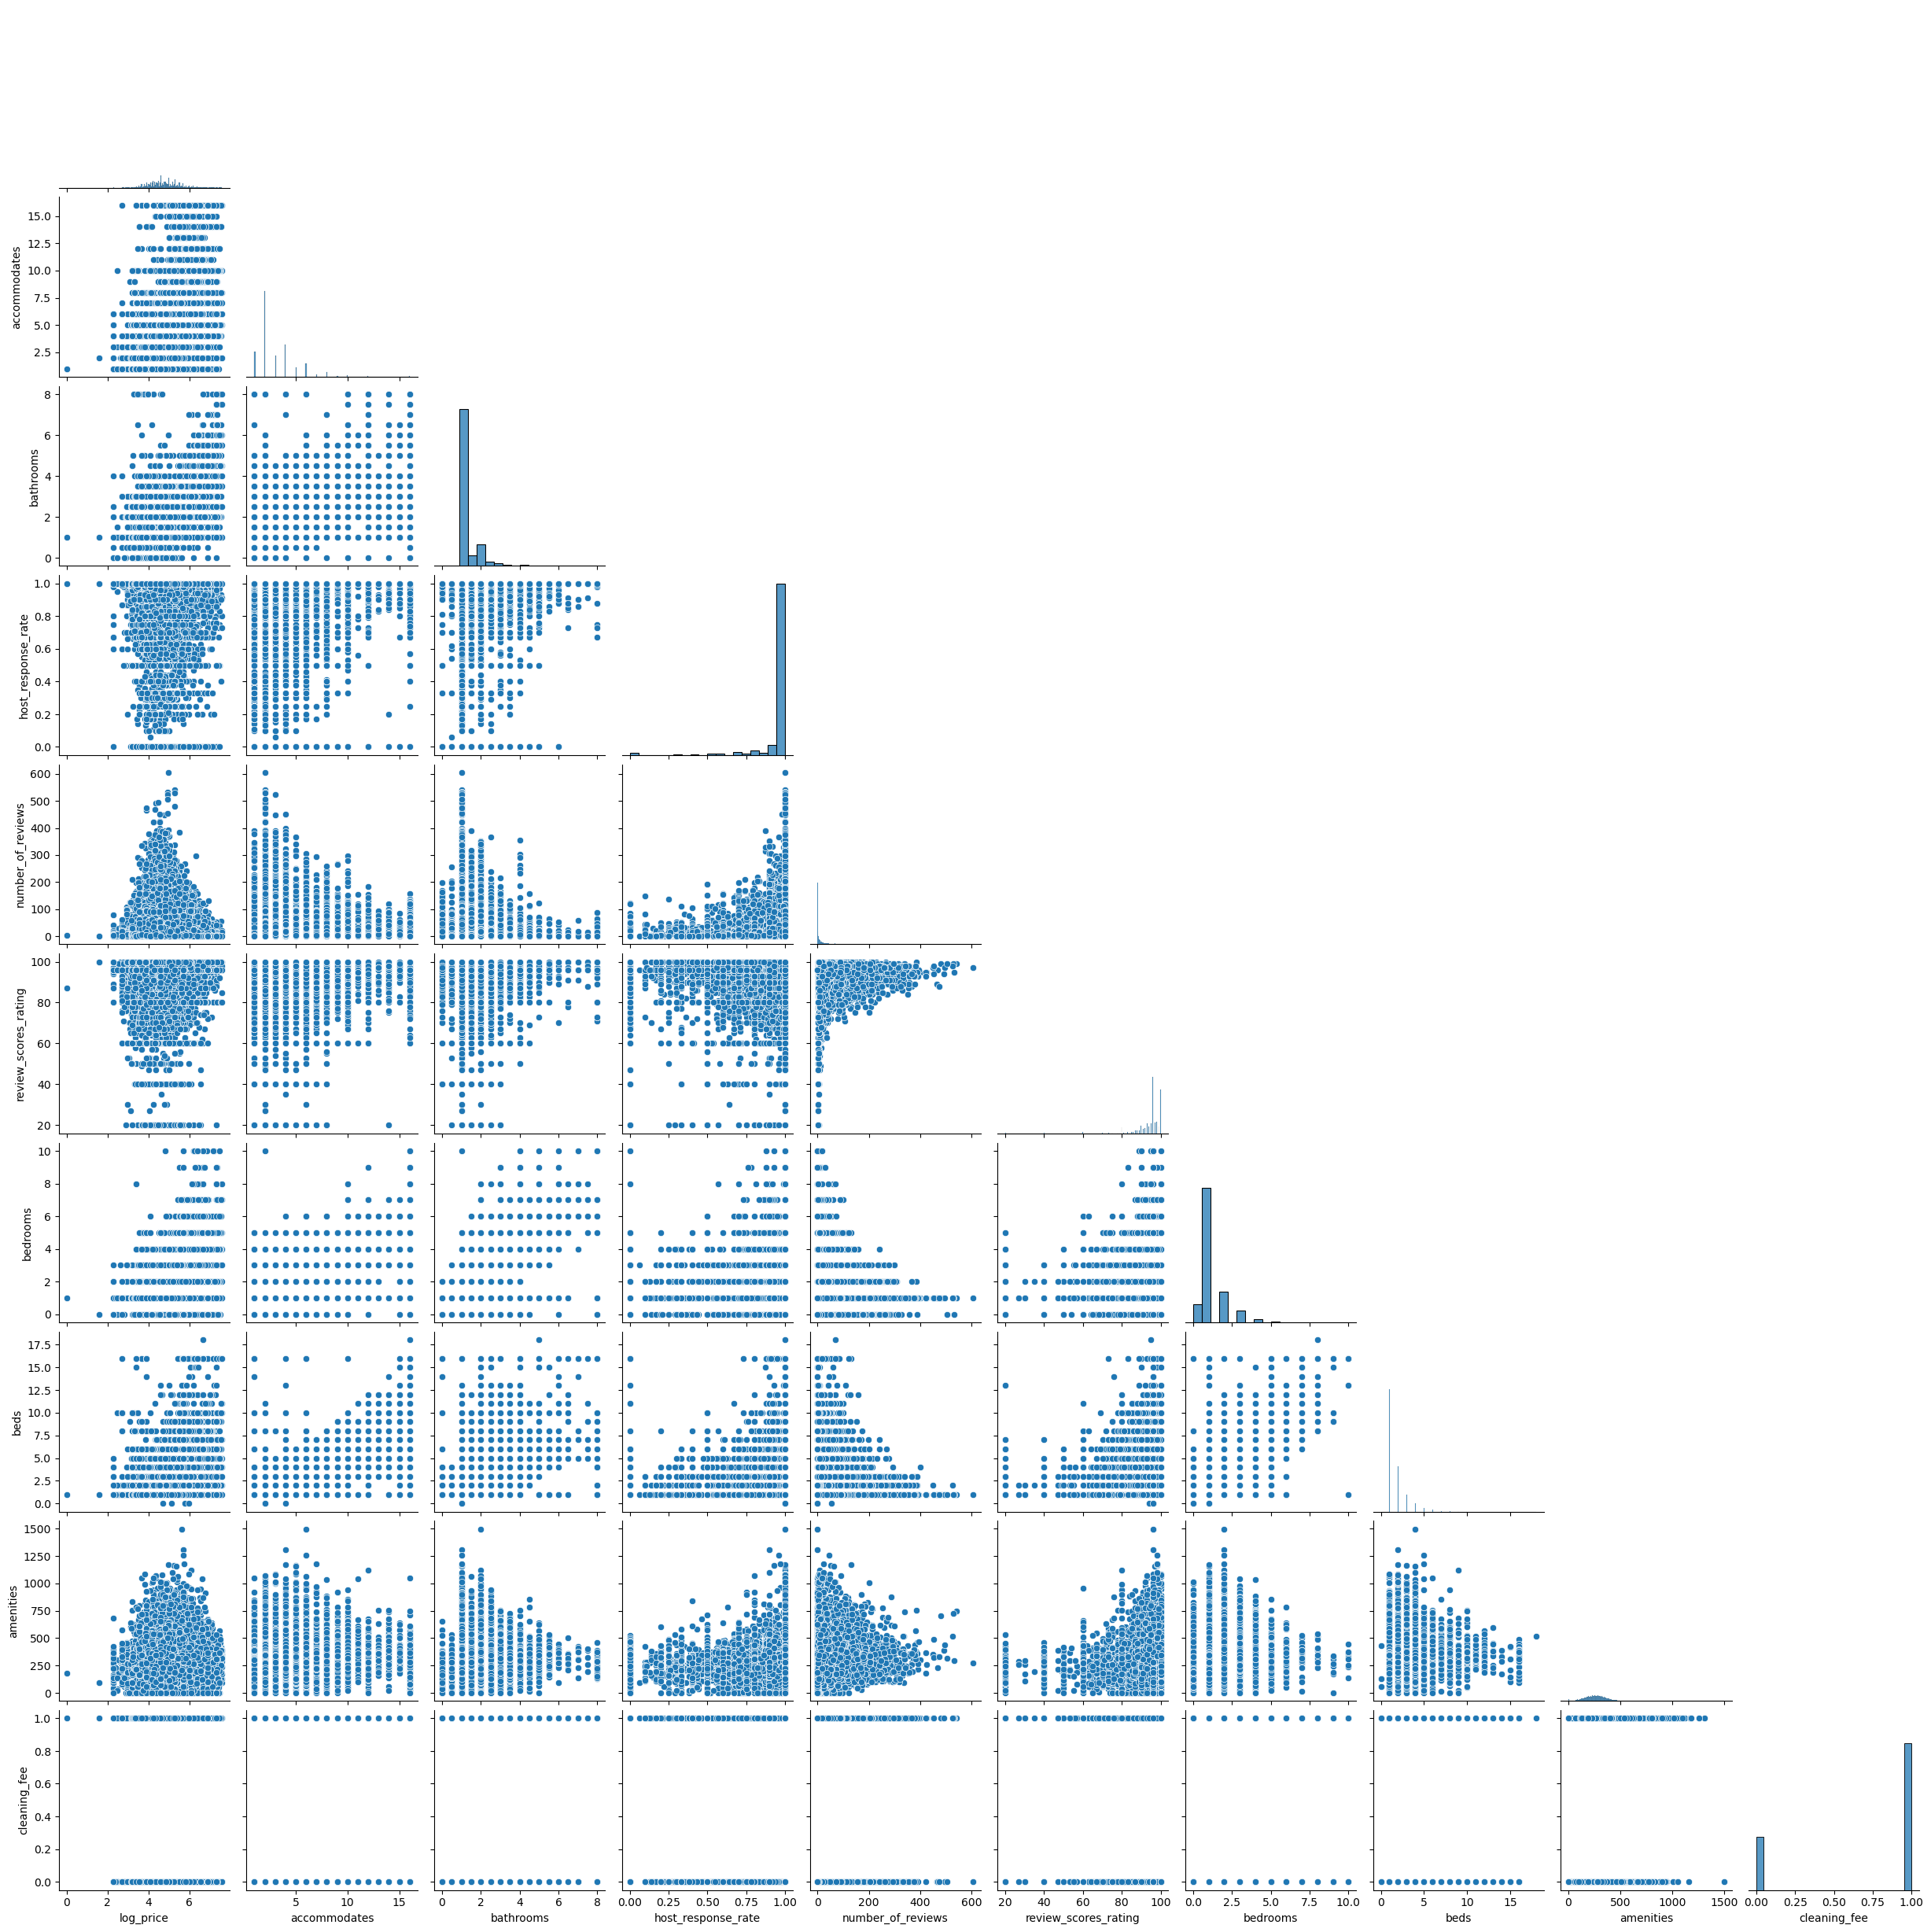

heatmap


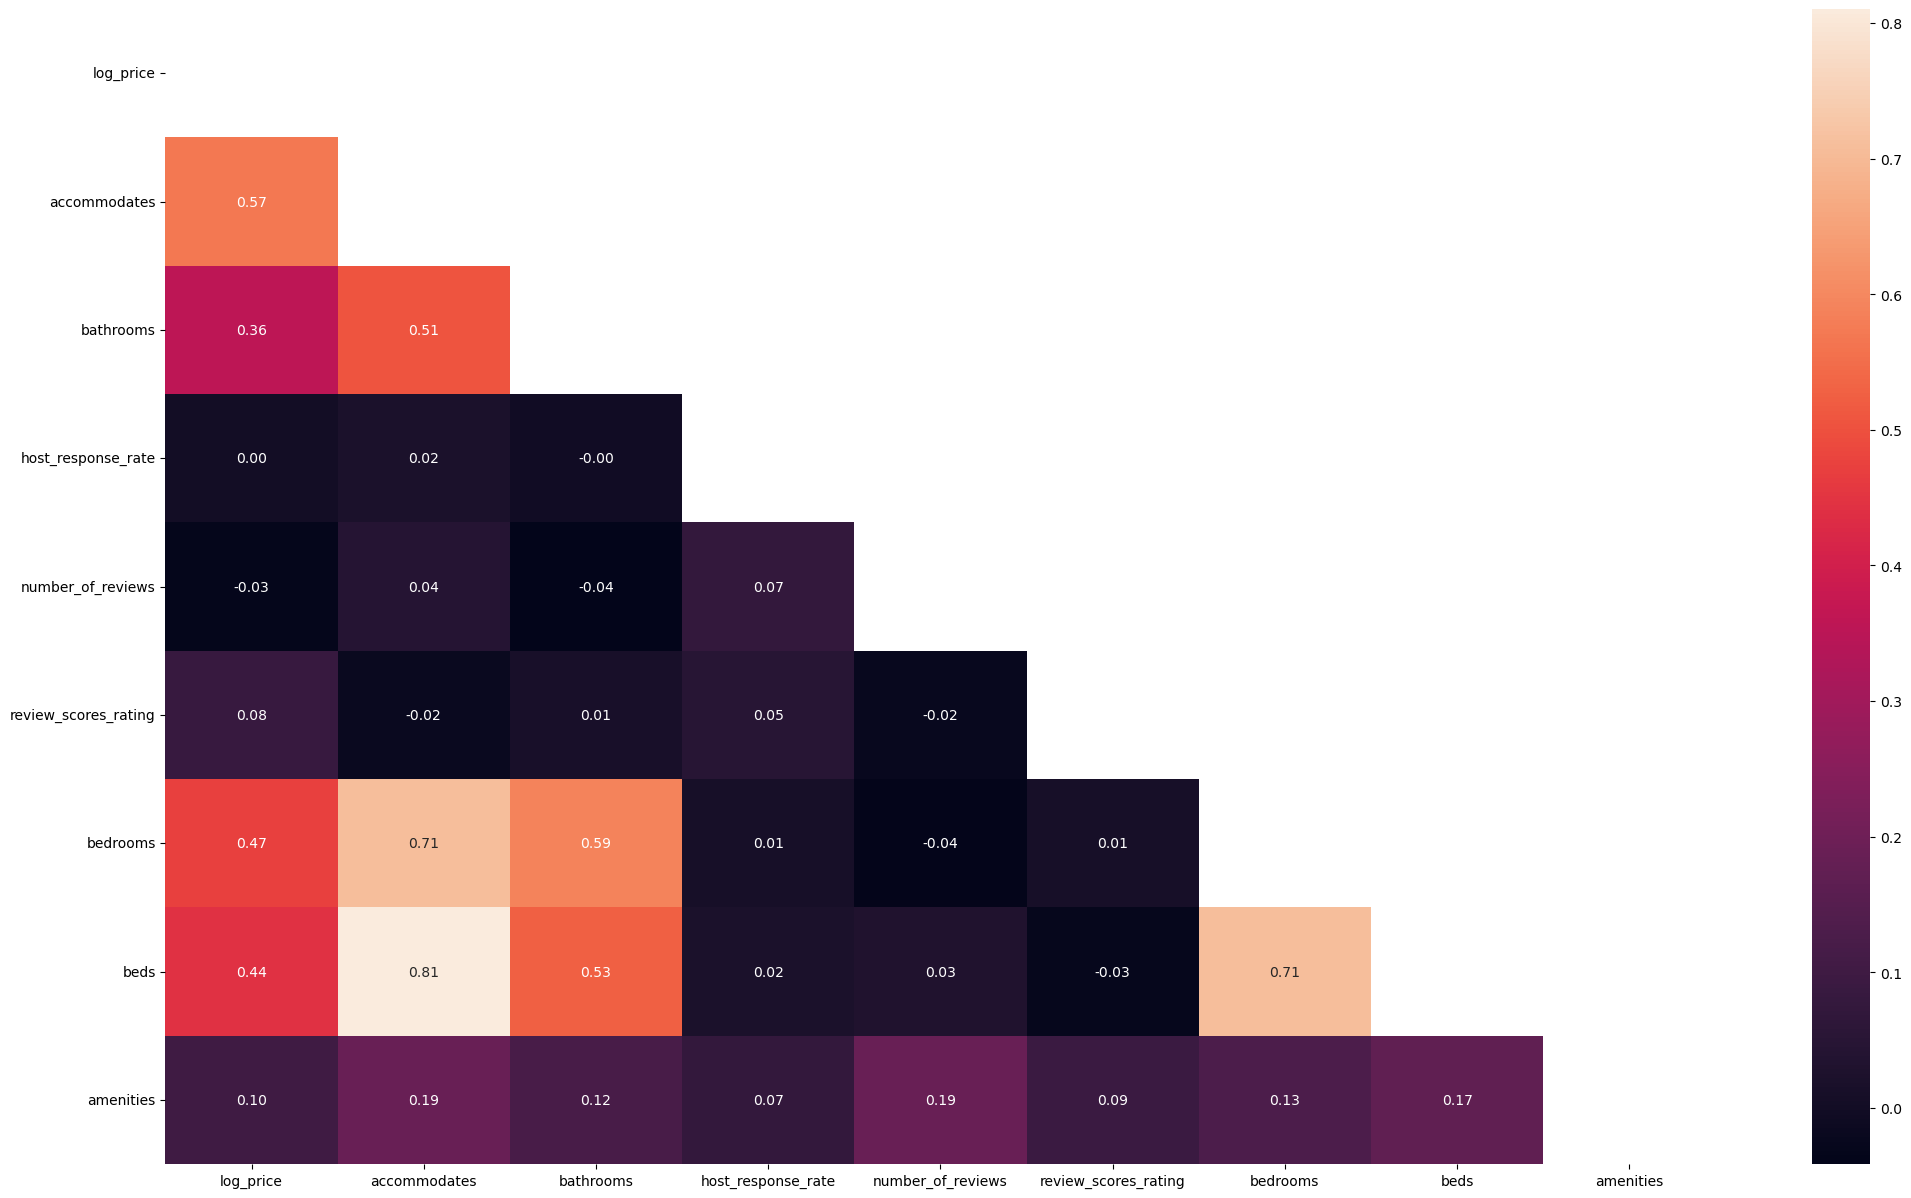

In [24]:
df_num = airbnb_v2.select_dtypes(include = 'number')
bivariate_num_num(airbnb_v2, df_num)

Key observations

Some pairs of attributes exhibit significant correlation

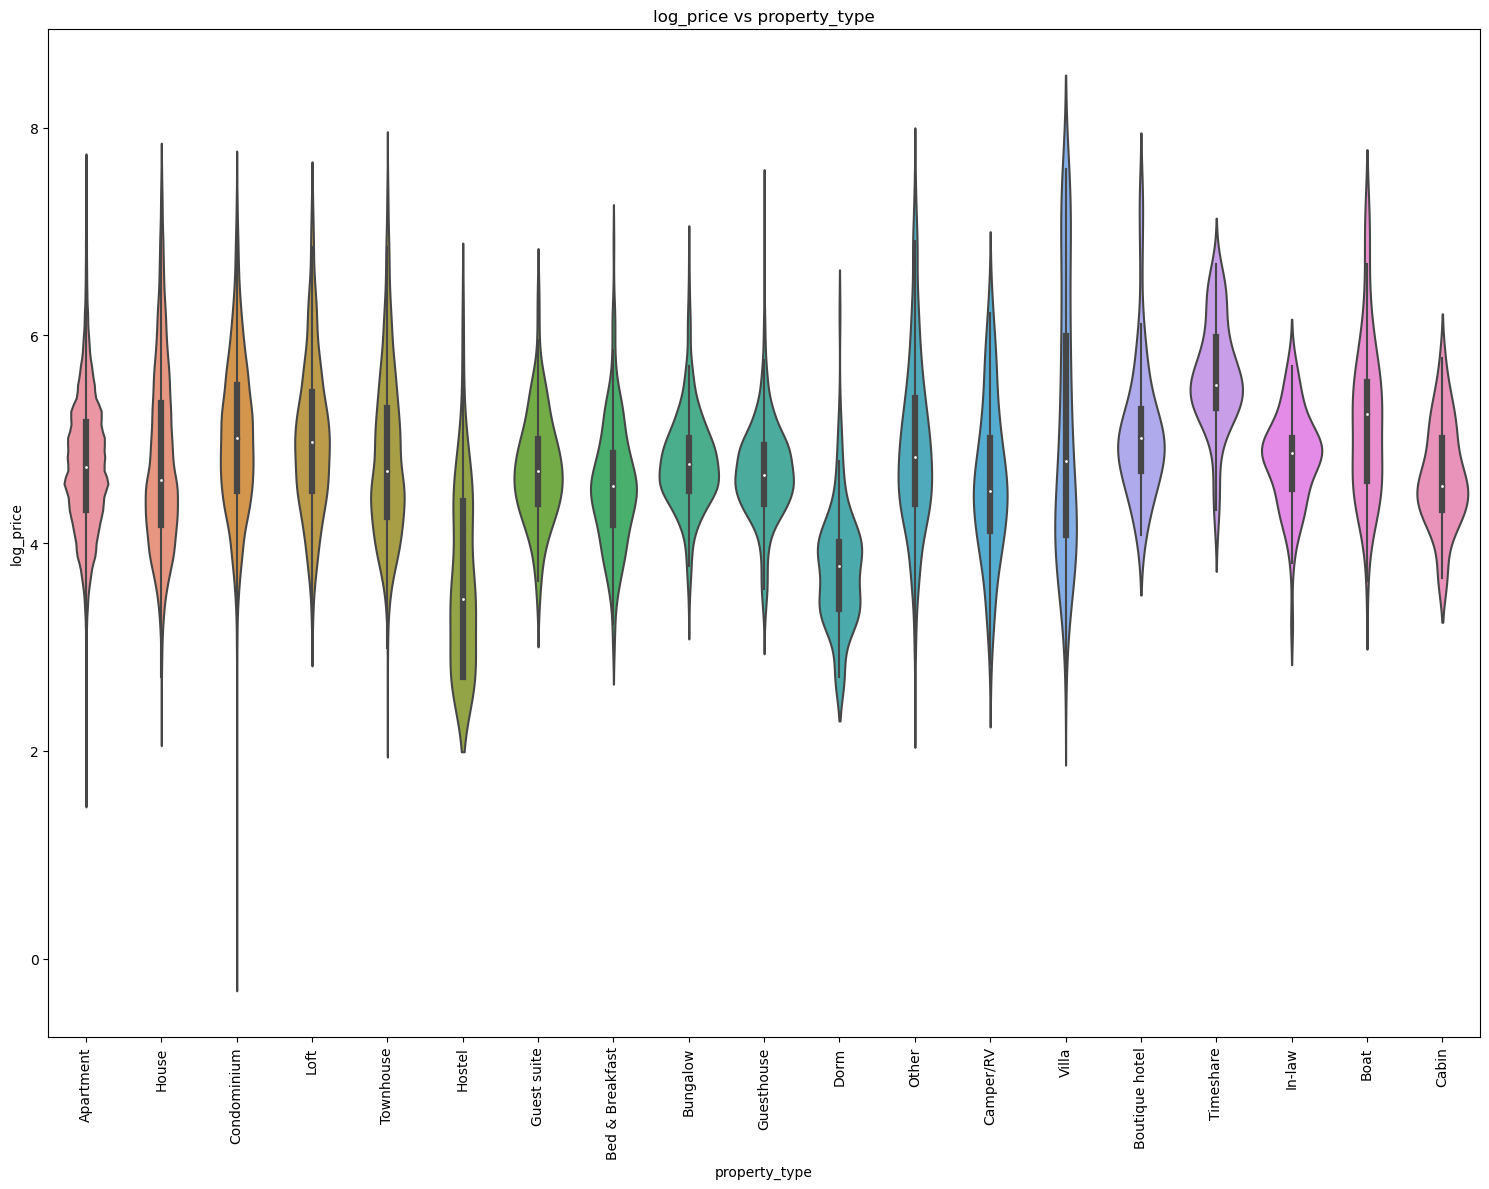

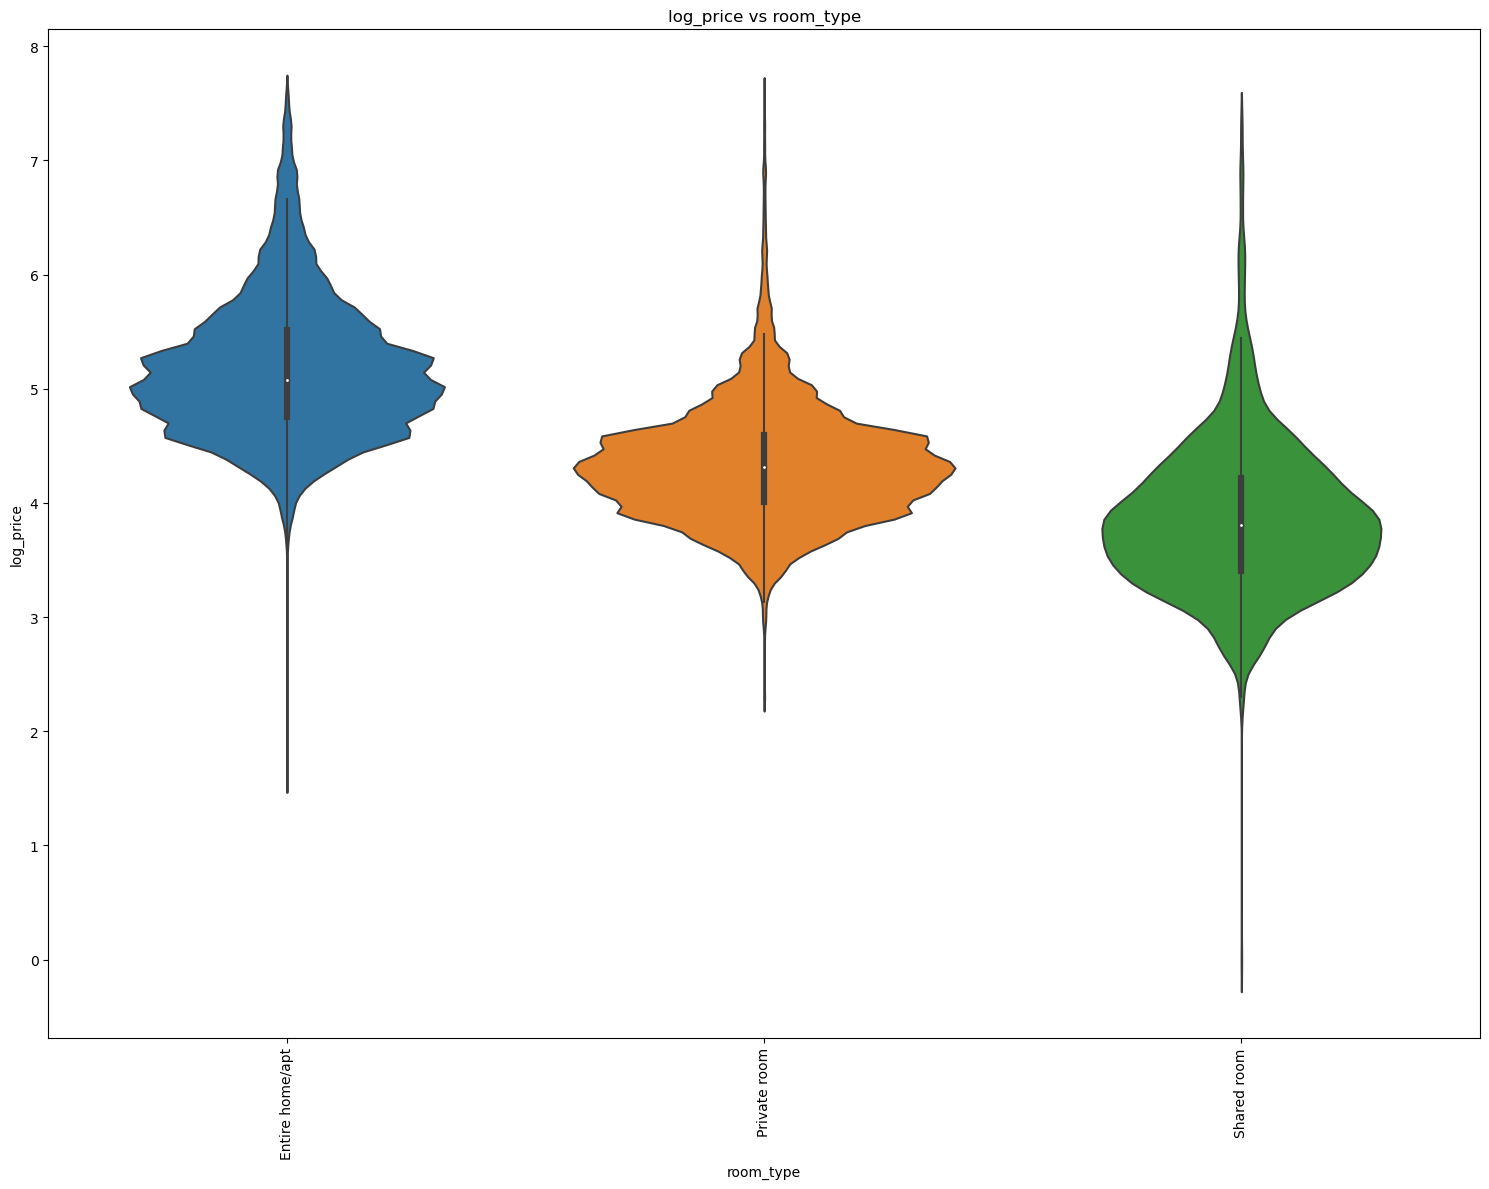

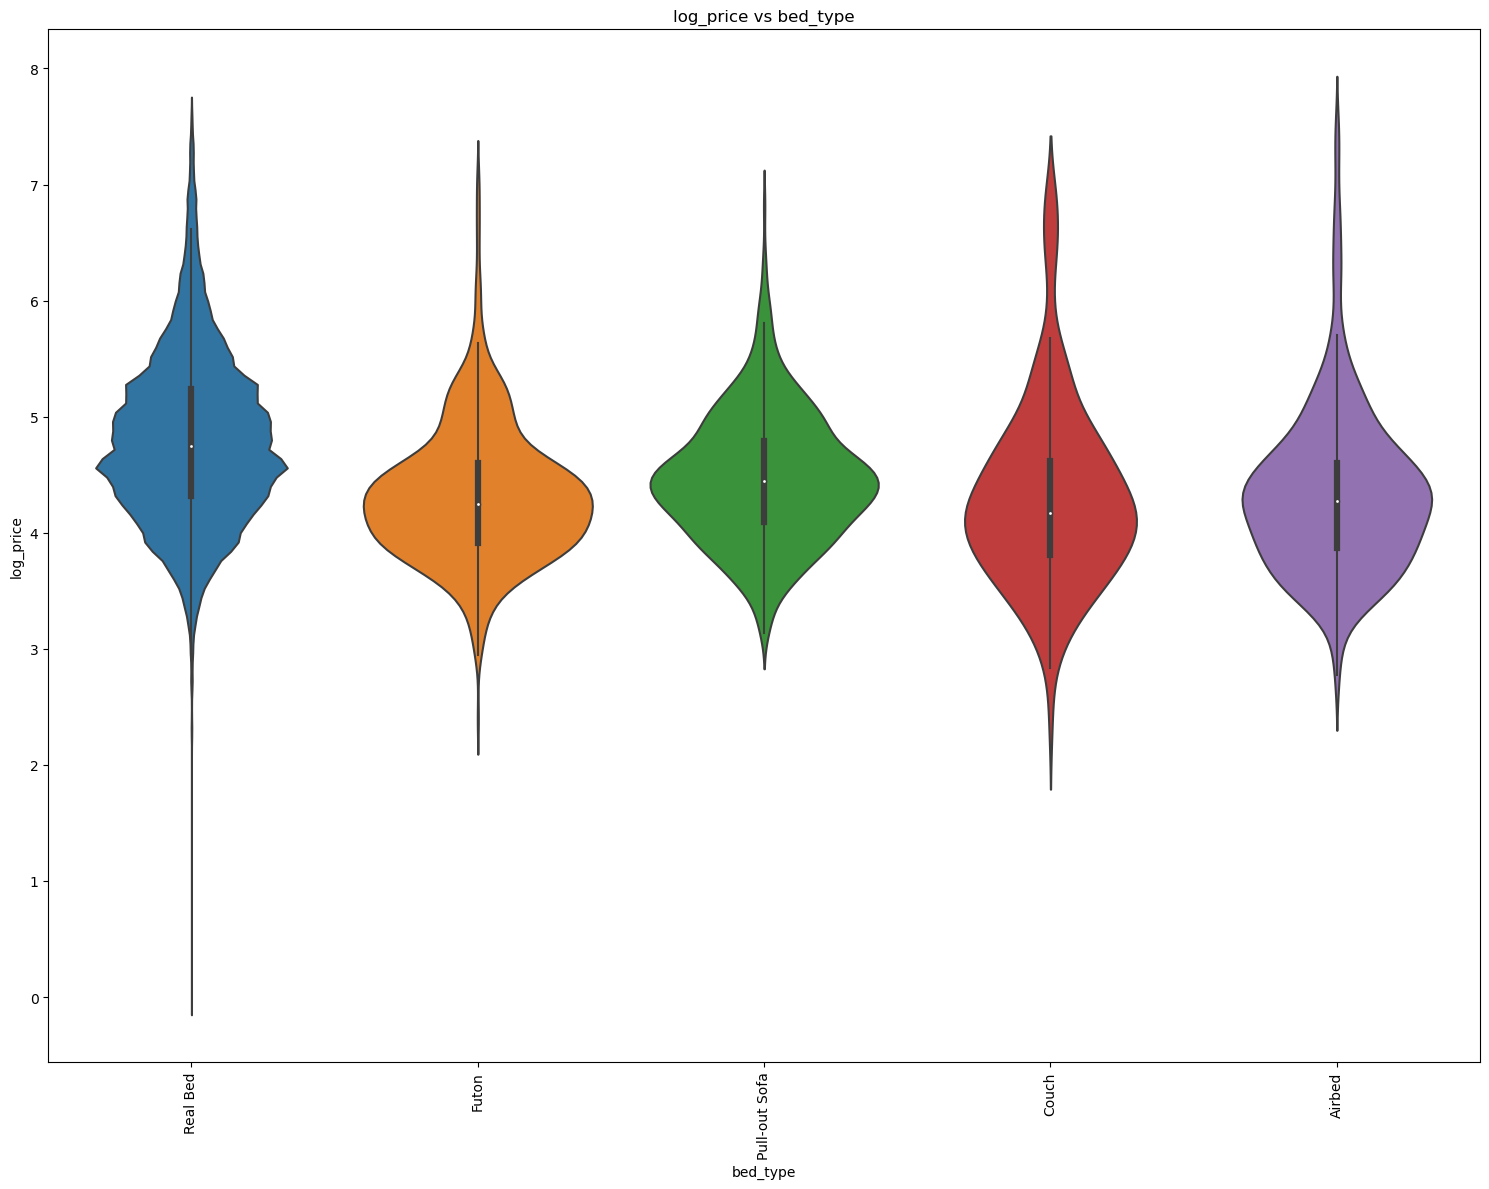

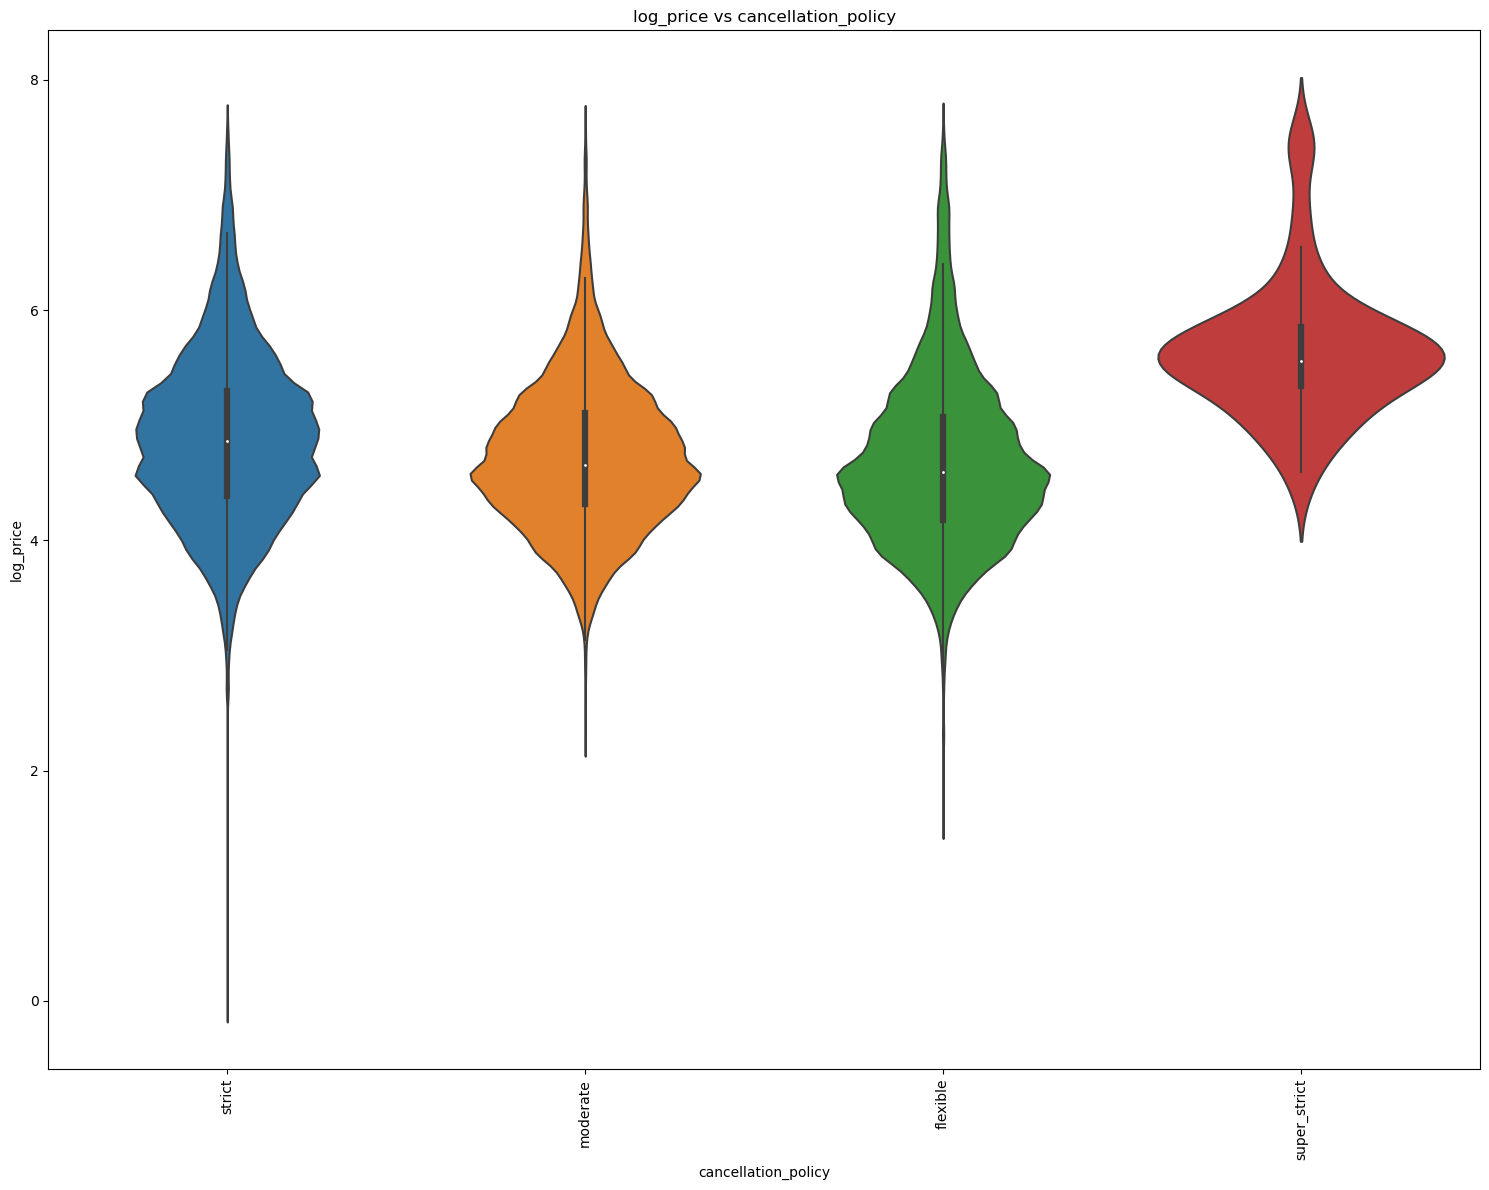

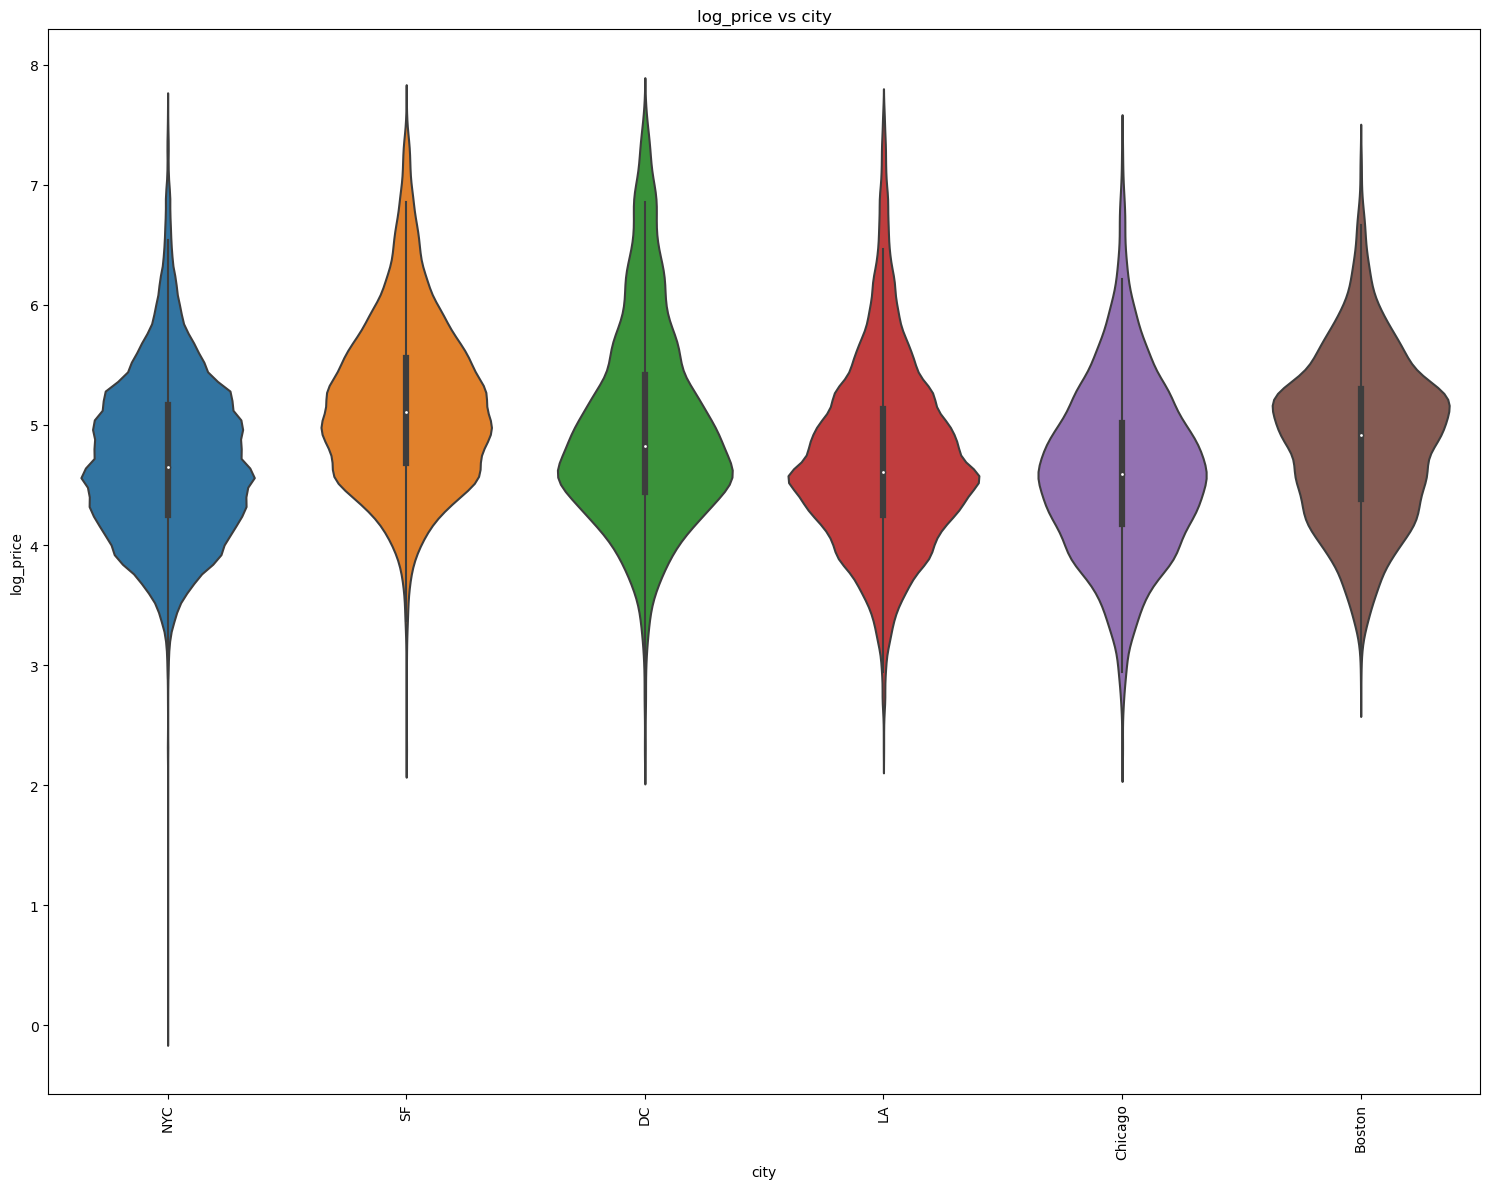

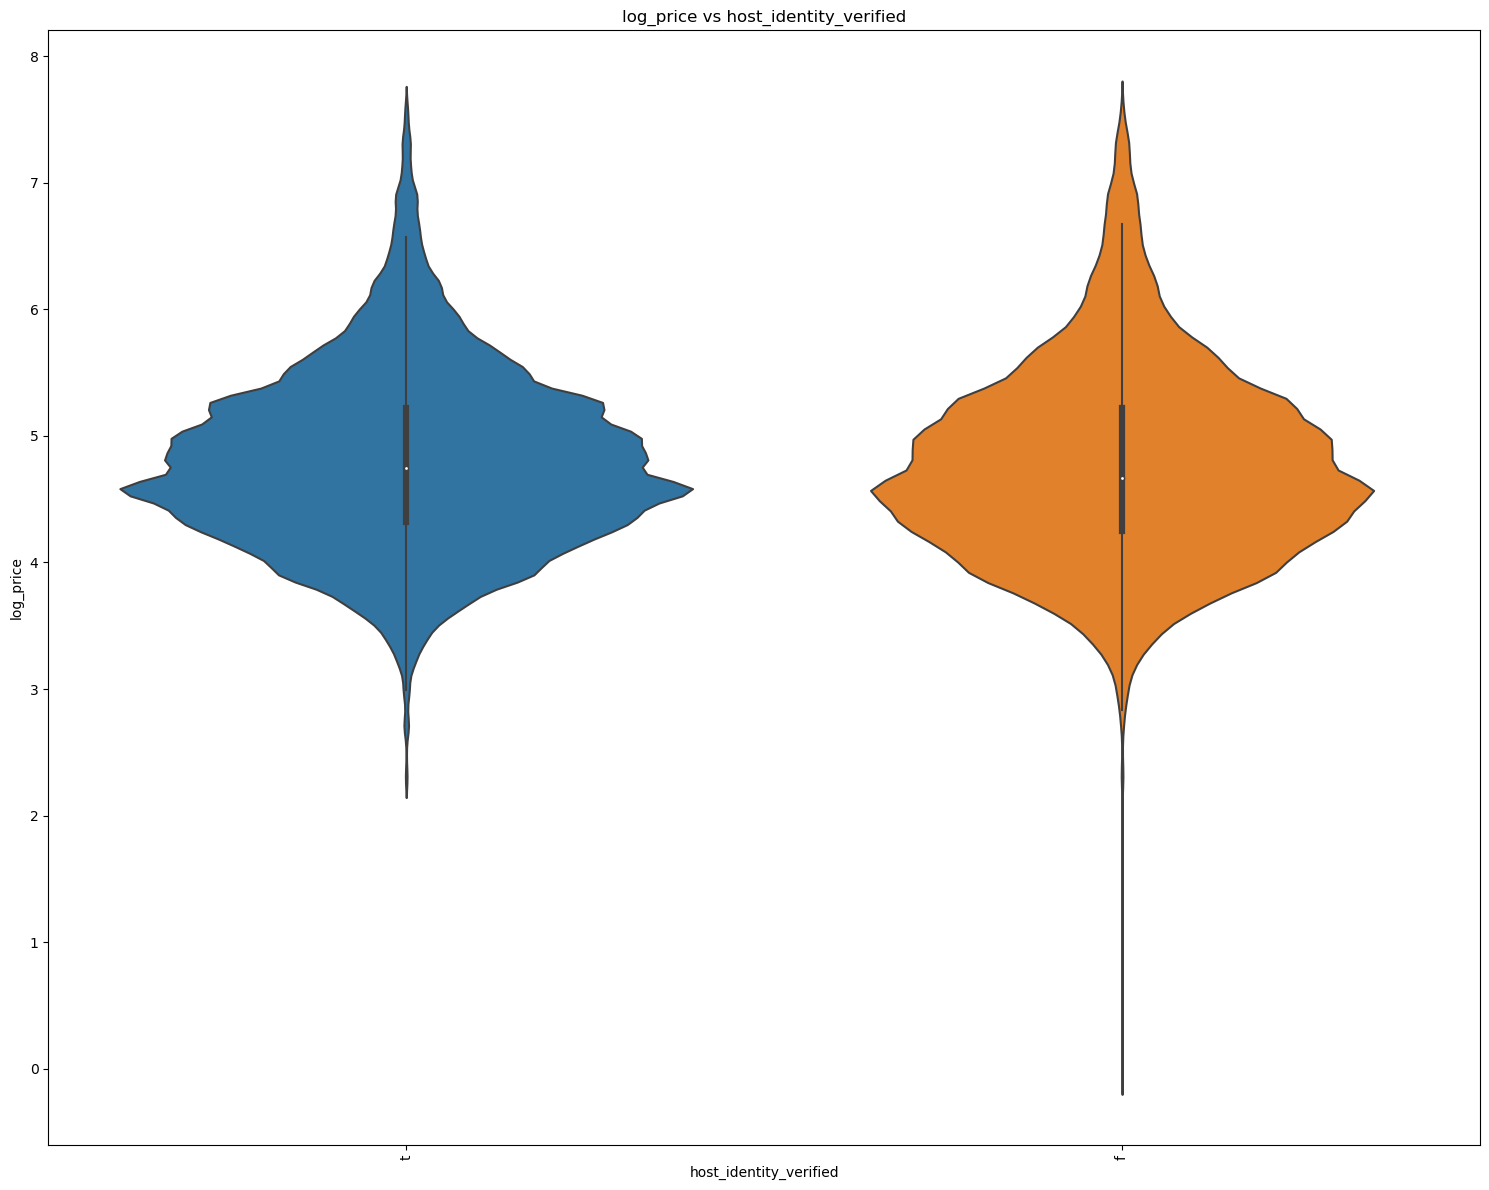

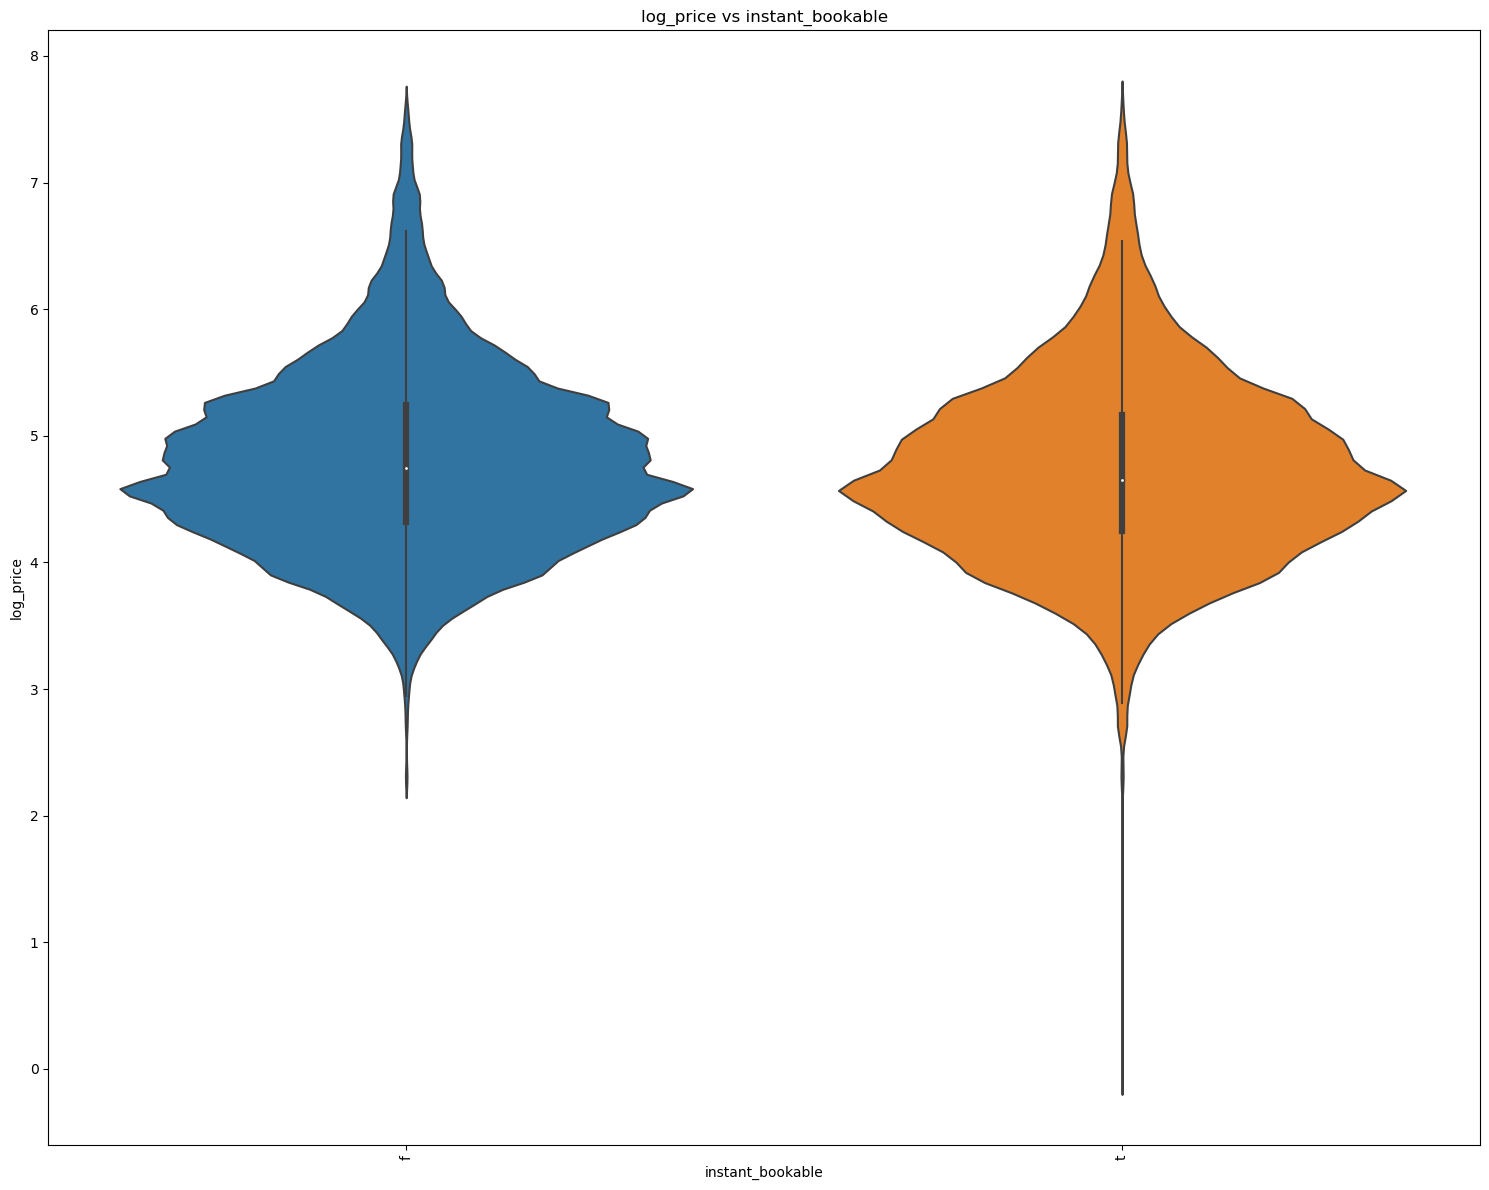

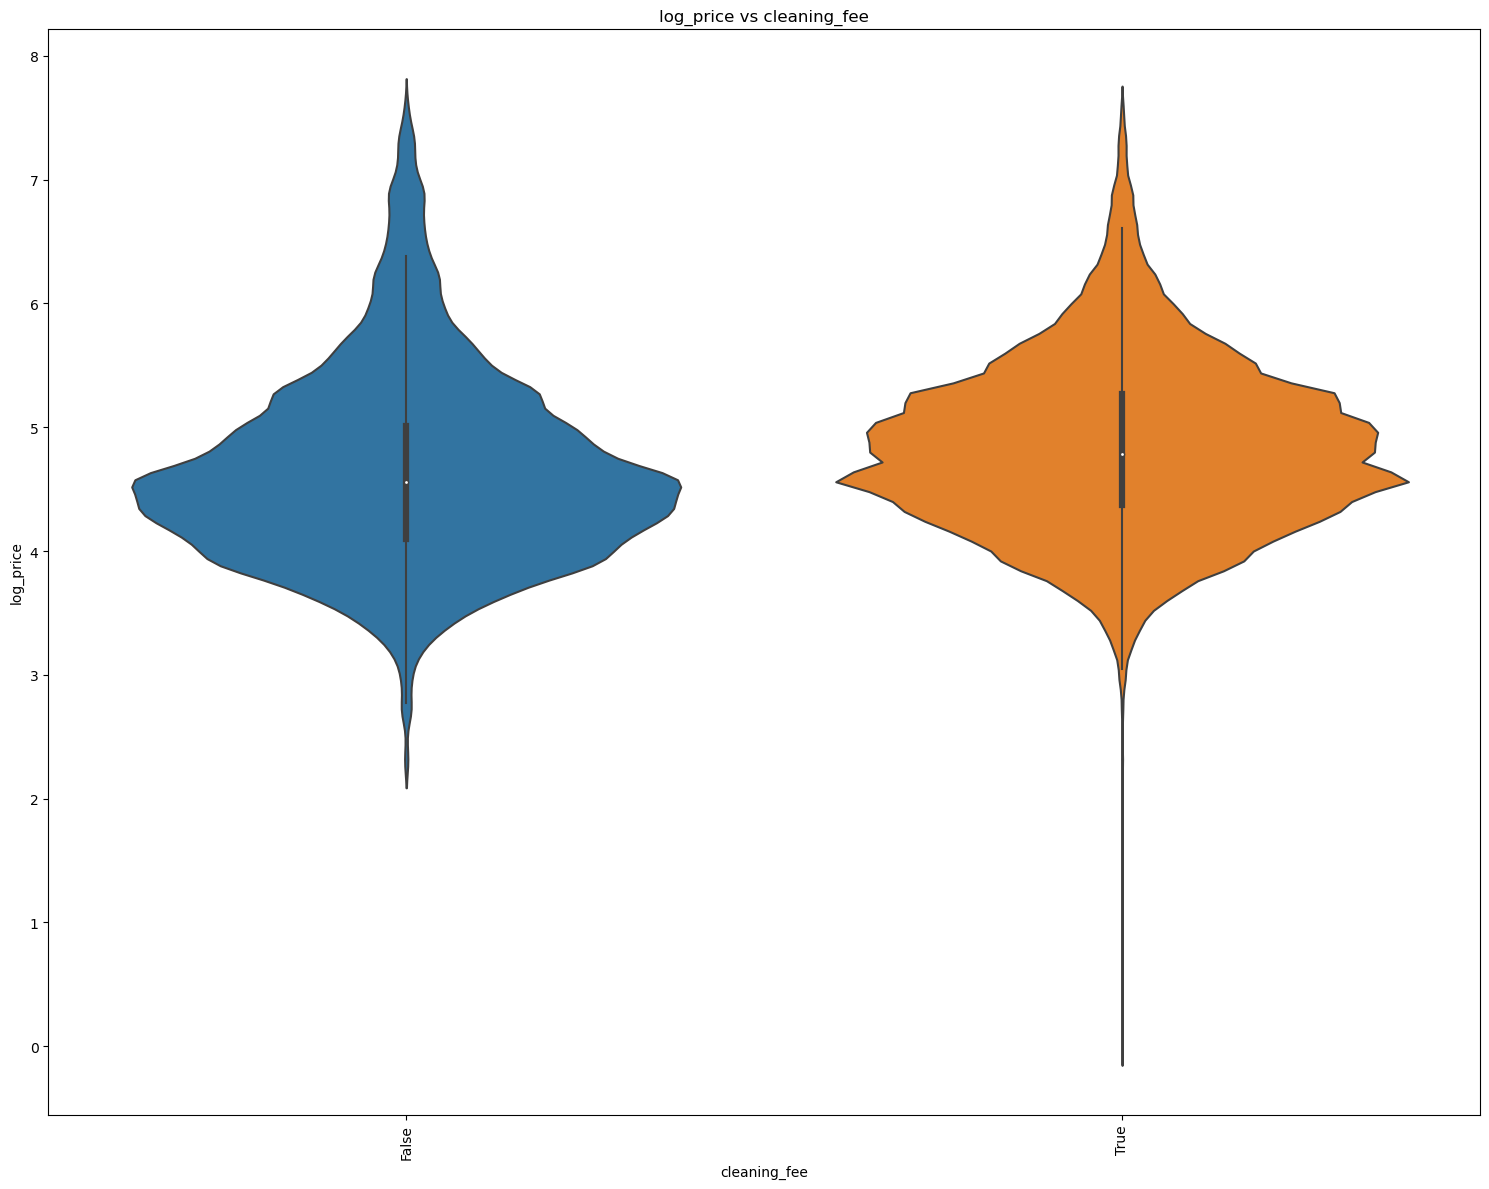

In [25]:
for col in airbnb_v2.select_dtypes(include = ['object', 'bool']).columns:
    plt.figure(figsize=(15, 12))
    sns.violinplot(x=col, y='log_price', data=airbnb_v2)
    plt.title(f'log_price vs {col}')
    plt.xticks(rotation=90)  # Rotate x-axis tick labels

    # Adjust layout
    plt.tight_layout()
    plt.show()
